In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pyarrow as pa
import os
import pyarrow.parquet as pq

import warnings
warnings.filterwarnings("ignore")


EDA DEL DF OUTPUTSTEAM_GAMES

In [2]:
# ruta del archivo Parquet
parquet_file_path = 'df_outputsteam_games.parquet'

# Lee el archivo Parquet 
df_outputsteam_games = pq.read_table(parquet_file_path).to_pandas()

df_outputsteam_games

,publisher,genres,app_name,release_date,price,id,developer
88310,kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
88311,making fun inc,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,0.00,643980,Secret Level SRL
88312,poolianscom,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,0.00,670290,Poolians.com
88313,,"[Action, Adventure, Casual]",弹炸人2222,2017,0.99,767400,彼岸领域
88315,trickjump games ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018,3.99,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...
120439,bidoniera games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018,1.99,745400,Bidoniera Games
120440,ghostrus games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018,1.99,773640,"Nikita ""Ghost_RUS"""
120441,sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018,4.99,733530,Sacada
120442,laush studio,"[Indie, Racing, Simulation]",Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich


In [3]:
df_outputsteam_games = df_outputsteam_games.reset_index(drop=True)
df_outputsteam_games

,publisher,genres,app_name,release_date,price,id,developer
0,kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
1,making fun inc,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,0.00,643980,Secret Level SRL
2,poolianscom,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,0.00,670290,Poolians.com
3,,"[Action, Adventure, Casual]",弹炸人2222,2017,0.99,767400,彼岸领域
4,trickjump games ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018,3.99,772540,Trickjump Games Ltd
...,...,...,...,...,...,...,...
28812,bidoniera games,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018,1.99,745400,Bidoniera Games
28813,ghostrus games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018,1.99,773640,"Nikita ""Ghost_RUS"""
28814,sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018,4.99,733530,Sacada
28815,laush studio,"[Indie, Racing, Simulation]",Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich


In [4]:
df_outputsteam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28817 entries, 0 to 28816
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     22977 non-null  string 
 1   genres        28701 non-null  object 
 2   app_name      28817 non-null  string 
 3   release_date  28817 non-null  int32  
 4   price         28817 non-null  float32
 5   id            28817 non-null  int32  
 6   developer     27593 non-null  string 
dtypes: float32(1), int32(2), object(1), string(3)
memory usage: 1.2+ MB


In [5]:
#  cantidad de datos nulos en filas del df

df_outputsteam_games.dropna(inplace=True)


In [6]:
# verificando en la fila 2 los tipos de generos contenidos
df_outputsteam_games['genres'][2]


array(['Casual', 'Free to Play', 'Indie', 'Simulation', 'Sports'],
      dtype=object)

In [7]:
df_outputsteam_games.isnull().sum()

publisher       0
genres          0
app_name        0
release_date    0
price           0
id              0
developer       0
dtype: int64

In [8]:
#separando con explode los datos de genres a filas individuales
df_outputsteam_games = df_outputsteam_games.explode('genres')
df_outputsteam_games.head(20)


,publisher,genres,app_name,release_date,price,id,developer
0,kotoshiro,Action,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Casual,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Indie,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Simulation,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Strategy,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
1,making fun inc,Free to Play,Ironbound,2018,0.00,643980,Secret Level SRL
1,making fun inc,Indie,Ironbound,2018,0.00,643980,Secret Level SRL
1,making fun inc,RPG,Ironbound,2018,0.00,643980,Secret Level SRL
1,making fun inc,Strategy,Ironbound,2018,0.00,643980,Secret Level SRL
2,poolianscom,Casual,Real Pool 3D - Poolians,2017,0.00,670290,Poolians.com


In [9]:
# Eliminando valores nulos en genre: 
df_games = df_outputsteam_games.dropna(subset=['genres'])
df_games.head(20)

,publisher,genres,app_name,release_date,price,id,developer
0,kotoshiro,Action,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Casual,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Indie,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Simulation,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
0,kotoshiro,Strategy,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
1,making fun inc,Free to Play,Ironbound,2018,0.00,643980,Secret Level SRL
1,making fun inc,Indie,Ironbound,2018,0.00,643980,Secret Level SRL
1,making fun inc,RPG,Ironbound,2018,0.00,643980,Secret Level SRL
1,making fun inc,Strategy,Ironbound,2018,0.00,643980,Secret Level SRL
2,poolianscom,Casual,Real Pool 3D - Poolians,2017,0.00,670290,Poolians.com


In [9]:
df_outputsteam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56403 entries, 0 to 28816
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     56403 non-null  string 
 1   genres        56403 non-null  object 
 2   app_name      56403 non-null  string 
 3   release_date  56403 non-null  int32  
 4   price         56403 non-null  float32
 5   id            56403 non-null  int32  
 6   developer     56403 non-null  string 
dtypes: float32(1), int32(2), object(1), string(3)
memory usage: 2.8+ MB


In [10]:
#  verificando duplicados
datos_duplicados = df_outputsteam_games.duplicated()

#  viendo la cantidad total de duplicados,  sumar los valores True
cantidad_duplicados = datos_duplicados.sum()

# imprimirá True para las filas que son duplicadas y False para las que no lo son
print(datos_duplicados)

# cantidad total de filas duplicadas en el DataFrame
print(f"Cantidad total de filas duplicadas: {cantidad_duplicados}")

0        False
0        False
0        False
0        False
0        False
         ...  
28815    False
28815    False
28815    False
28816    False
28816    False
Length: 56403, dtype: bool
Cantidad total de filas duplicadas: 1


In [11]:
# Eliminando las filas duplicadas y modificando el DataFrame original

df_outputsteam_games.drop_duplicates(inplace=True)

In [12]:
df_outputsteam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56402 entries, 0 to 28816
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     56402 non-null  string 
 1   genres        56402 non-null  object 
 2   app_name      56402 non-null  string 
 3   release_date  56402 non-null  int32  
 4   price         56402 non-null  float32
 5   id            56402 non-null  int32  
 6   developer     56402 non-null  string 
dtypes: float32(1), int32(2), object(1), string(3)
memory usage: 2.8+ MB


In [13]:
df_outputsteam_games = df_outputsteam_games.reset_index(drop=True)
df_outputsteam_games

,publisher,genres,app_name,release_date,price,id,developer
0,kotoshiro,Action,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
1,kotoshiro,Casual,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
2,kotoshiro,Indie,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
3,kotoshiro,Simulation,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
4,kotoshiro,Strategy,Lost Summoner Kitty,2018,4.99,761140,Kotoshiro
...,...,...,...,...,...,...,...
56397,laush studio,Indie,Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich
56398,laush studio,Racing,Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich
56399,laush studio,Simulation,Russian Roads,2018,1.99,610660,Laush Dmitriy Sergeevich
56400,sixnails,Casual,EXIT 2 - Directions,2017,4.99,658870,"xropi,stev3ns"


In [14]:
#resumen estadistico de las variables numericas
df_outputsteam_games.describe()

,release_date,price,id
count,56402.000000,56402.000000,5.640200e+04
mean,2015.097958,9.027379,4.546419e+05
std,3.020881,16.895475,1.804944e+05
min,1983.000000,0.000000,1.000000e+01
25%,2015.000000,1.990000,3.314000e+05
50%,2016.000000,4.990000,4.496020e+05
75%,2017.000000,9.990000,5.956475e+05
max,2021.000000,995.000000,2.028850e+06


In [15]:

# Identificando las columnas numéricas
columnas_numericas = df_outputsteam_games.select_dtypes(include=[np.number]).columns

# Calculando la media solo en las columnas numéricas
media_por_columna = df_outputsteam_games[columnas_numericas].mean()

# Imprimir la media de cada columna numérica
media_por_columna


release_date      2015.097958
price                9.027379
id              454641.929116
dtype: float64

podemos observar que el promedio del anio en lanzamientos fue en 2015 y
el precio promedio de cada juego de 9 usd

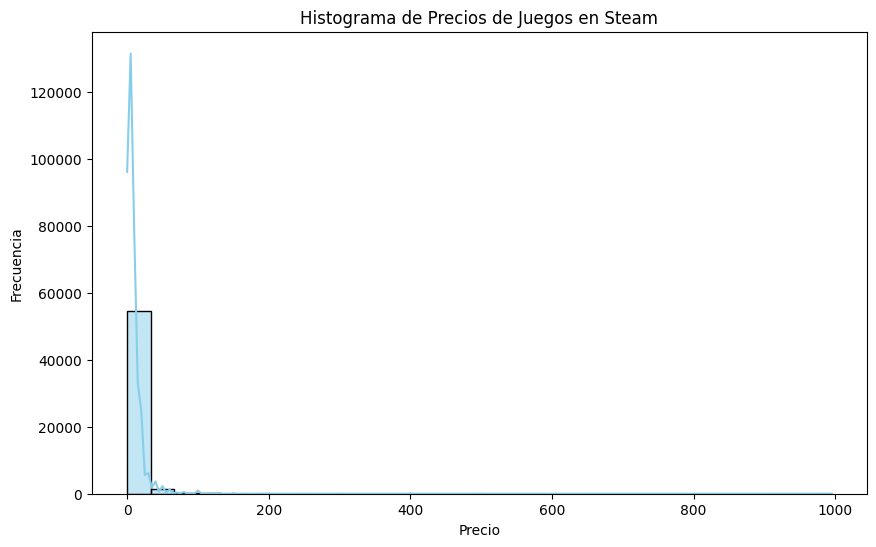

In [16]:
precios = df_outputsteam_games['price']
plt.figure(figsize=(10, 6))

# Crear el histograma utilizando seaborn
sns.histplot(precios, bins=30, kde=True, color='skyblue')

# Configurar las etiquetas y título del gráfico
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios de Juegos en Steam')

# Mostrar el histograma
plt.show()


El gráfico muestra que la distribución de los precios de los videojuegos en Steam es aproximadamente normal,
 con una media de alrededor de $20 


 El gráfico muestra la distribución de los precios de los videojuegos en Steam.
El eje x representa el precio del juego en dólares.
El eje y representa la densidad de juegos a ese precio.
El valor máximo en el eje y es de alrededor de 0.003, lo que significa que hay aproximadamente 0.003 juegos por cada dólar de precio.
El punto de precio más alto que se muestra en el gráfico es de alrededor de $120.
Es posible que haya juegos en Steam que cuesten más de $120, pero estos datos no lo muestran.

In [17]:
indice_precio_maximo = df_outputsteam_games['price'].idxmax()
indice_precio_maximo

21145

In [18]:
indice_precio_minimo = df_outputsteam_games['price'].idxmin()
indice_precio_minimo

5

In [19]:
juego_mas_caro = df_outputsteam_games.loc[indice_precio_maximo]
juego_mas_barato = df_outputsteam_games.loc[indice_precio_minimo]


In [20]:
juego_mas_caro

publisher                              strata mixed reality inc
genres                                 Animation &amp; Modeling
app_name        Strata Spaces VR – Professional Edition Upgrade
release_date                                               2017
price                                                     995.0
id                                                       719000
developer                            Strata Mixed Reality, Inc.
Name: 21145, dtype: object

In [21]:
juego_mas_barato

publisher         making fun inc
genres              Free to Play
app_name               Ironbound
release_date                2018
price                        0.0
id                        643980
developer       Secret Level SRL
Name: 5, dtype: object

In [22]:
nombre_juego_caro = juego_mas_caro['app_name']
nombre_juego_caro

'Strata Spaces VR – Professional Edition Upgrade'

In [23]:
nombre_juego_barato = juego_mas_barato['app_name']
nombre_juego_barato

'Ironbound'

In [24]:
precio_juego_barato = juego_mas_barato['price']
precio_juego_barato

0.0

In [25]:
precio_juego_caro = juego_mas_caro['price']
precio_juego_caro

995.0

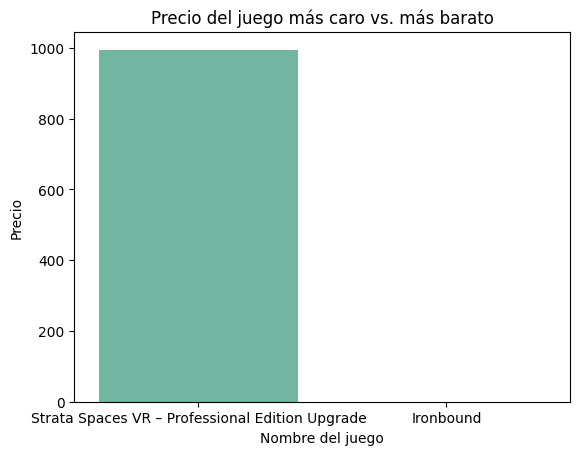

In [26]:
#extrayendo los nombres de juegos y precios del dataframe:

nombre_juego_caro = juego_mas_caro['app_name']
precio_juego_caro = juego_mas_caro['price']
nombre_juego_barato = juego_mas_barato['app_name']
precio_juego_barato = juego_mas_barato['price']

# Preparando la data para hacer el bar chart
etiquetas = [nombre_juego_caro, nombre_juego_barato]
valores = [precio_juego_caro, precio_juego_barato]

# Creando el bar chart with Seaborn
sns.barplot(x=etiquetas, y=valores,palette='Set2')    

# estableciendo titulos y etiquetas del grafico: 
plt.title("Precio del juego más caro vs. más barato")
plt.xlabel("Nombre del juego")
plt.ylabel("Precio")

# Show the chart
plt.show()


 Identificando  y Visualizando Outliers con Boxplot

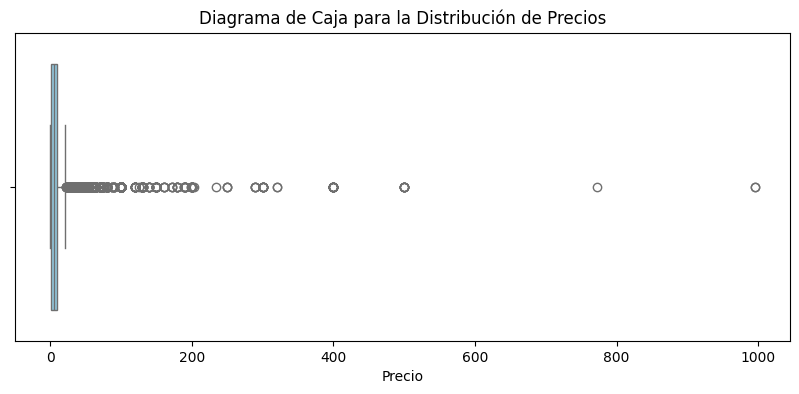

In [28]:

# Filtrando valores no nulos en la columna 'price' y convertirtiendo a tipo float
prices = df_outputsteam_games['price'].dropna().astype(float)

# Crear un boxplot para visualizar la distribución de los precios
plt.figure(figsize=(10, 4))
sns.boxplot(x=prices, color='skyblue')

# Etiqueta y título
plt.xlabel('Precio')
plt.title('Diagrama de Caja para la Distribución de Precios')

# Mostrar el diagrama de caja
plt.show()


Se puede observar que el promedio de precios van entre los 10 y 200 usd,se muestra valores atipicos cercanos a 900 usd

In [29]:
# Filtrar juegos con precios atípicos (entre $500 y $1000)
outliers_expensive = df_outputsteam_games[(df_outputsteam_games['price'] >= 500) & (df_outputsteam_games['price'] <= 1000)]

# Contar la cantidad de juegos con precios atípicos dentro del rango especificado
num_outliers_expensive = len(outliers_expensive)

print(f"La cantidad de juegos con precios atípicos (entre $500 y $1000 USD) es: {num_outliers_expensive}")


La cantidad de juegos con precios atípicos (entre $500 y $1000 USD) es: 3


In [30]:
# Filtrar juegos con precios entre $500 y $1000 USD
games_between_500_1000 = df_outputsteam_games[(df_outputsteam_games['price'] >= 500) & (df_outputsteam_games['price'] <= 1000)]

# Mostrar información de los juegos dentro del rango especificado
print("Juegos con precios entre $500 y $1000 USD:")
print(games_between_500_1000[['app_name', 'price']])

Juegos con precios entre $500 y $1000 USD:
                                              app_name       price
3917                        X-Plane 10 Global - 64 Bit  771.710022
21145  Strata Spaces VR – Professional Edition Upgrade  995.000000
21146  Strata Spaces VR – Professional Edition Upgrade  995.000000


Calculando y Visualizando Outliers Basados en Percentiles:

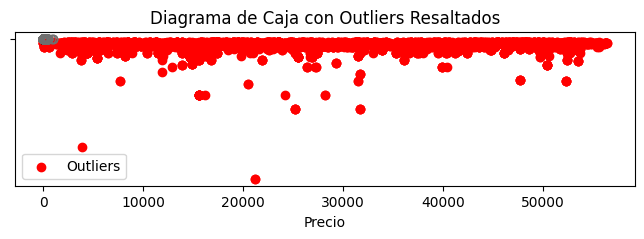

Valores atípicos (outliers):
24       29.990000
25       29.990000
26       29.990000
27       29.990000
52       59.990002
           ...    
56305    29.990000
56306    29.990000
56307    29.990000
56348    29.990000
56349    29.990000
Name: price, Length: 3298, dtype: float64


In [32]:
# Calcular los cuartiles
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)

# Calcular el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Calcular los límites para detectar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar outliers
outliers = prices[(prices < lower_bound) | (prices > upper_bound)]

# Creando el  diagrama de caja con outliers resaltados
plt.figure(figsize=(8, 2))
sns.boxplot(x=prices, color='skyblue')
plt.scatter(x=outliers.index, y=outliers, color='red', label='Outliers')

# Etiqueta y título
plt.xlabel('Precio')
plt.title('Diagrama de Caja con Outliers Resaltados')

# Mostrar el diagrama de caja con outliers
plt.legend()
plt.show()

# Imprimir los outliers identificados
print("Valores atípicos (outliers):")
print(outliers)


Los bigotes se extienden desde la caja hacia arriba y abajo. Muestran la dispersión de los datos que aún se consideran parte de la distribución normal. En otras palabras, los bigotes indican el rango de valores que no son valores atípicos.
Los círculos en la parte superior e inferior son valores atípicos. Representan precios que se encuentran fuera del rango esperado.
En resumen, el diagrama de caja indica que la distribución de precios está sesgada hacia la derecha. Esto significa que hay más precios por encima del 0,3% que por debajo. También hay valores atípicos en ambos extremos de la distribución.

In [33]:
# obtenemos la cantidad de juegos por año de lanzamiento:

lanzamiento_por_anio = df_outputsteam_games["release_date"].value_counts() 
lanzamiento_por_anio

release_date
2017    20023
2016    13788
2015     9137
2014     4681
2013     2530
2012     2030
2011      971
2010      682
2009      496
2008      319
2007      255
2006      230
2018      209
2005      120
2003      117
2001       97
2004       90
1998       72
1999       69
2000       66
1997       63
2002       60
1996       57
1994       51
1995       48
1993       39
1992       24
1991       19
1989       11
1990       11
1988        9
2019        6
1986        5
1984        5
1987        5
2021        3
1983        3
1985        1
Name: count, dtype: int64

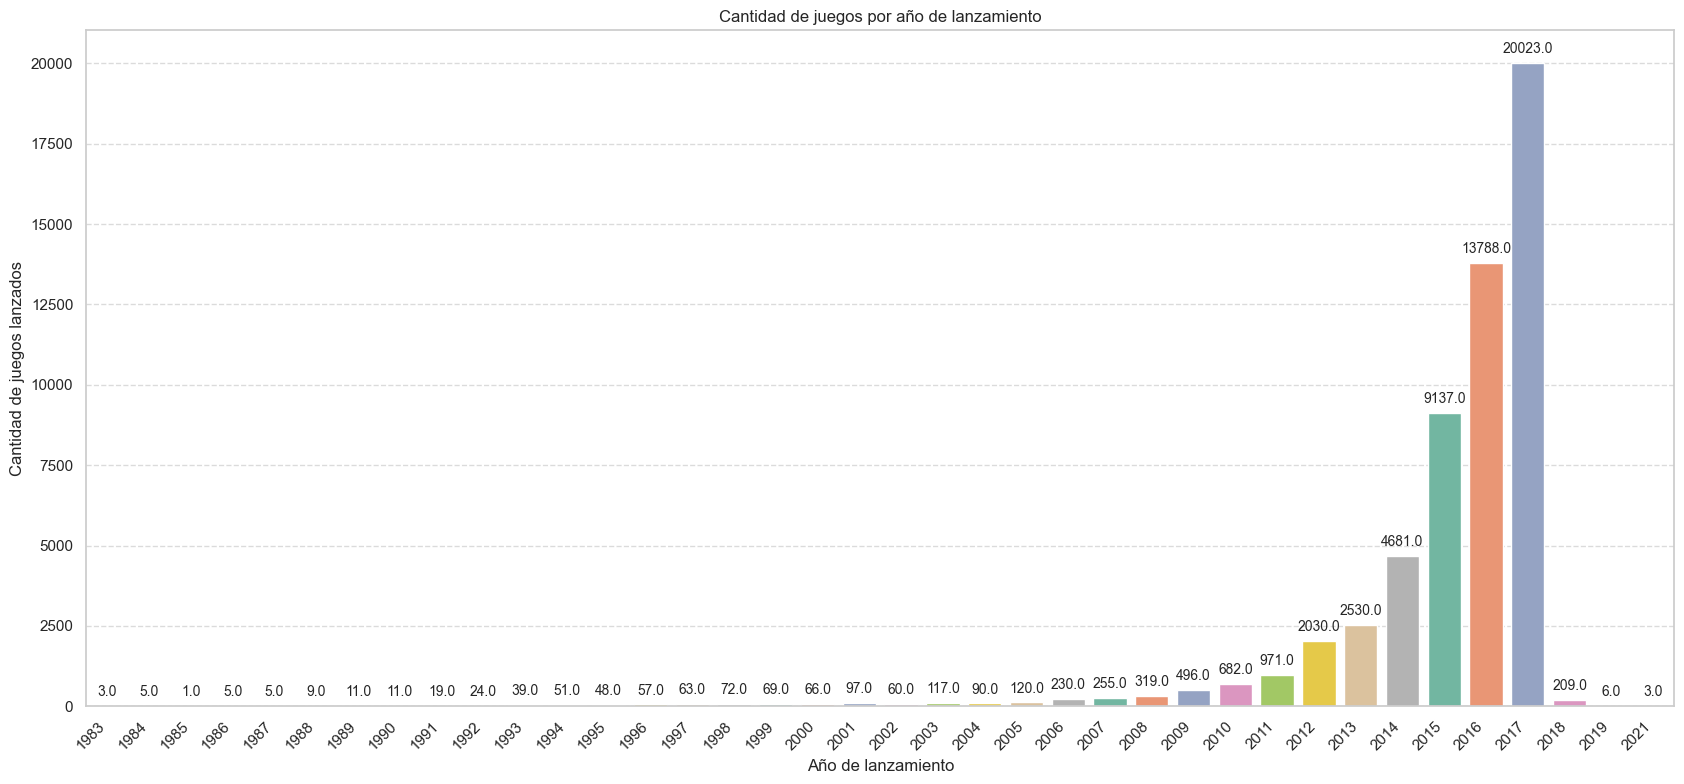

In [34]:
lanzamiento_por_anio = lanzamiento_por_anio.sort_index()

sns.set(style="whitegrid")

plt.figure(figsize=(17, 8))

ax = sns.barplot(x=lanzamiento_por_anio.index, y=lanzamiento_por_anio.values, palette="Set2")

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)

ax.set(xlabel='Año de lanzamiento', ylabel='Cantidad de juegos lanzados',
       title='Cantidad de juegos por año de lanzamiento')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

En el grafico se observa que el anio de lanzamiento con menor cantidad de juegos es en 1983 cno solo 3 y el de mayor es en 2017 con 20023

In [35]:
# obtenemos la cantidad de juegos por género
genero_juego = df_outputsteam_games["genres"].value_counts() 
genero_juego

genres
Indie                12705
Action                9441
Adventure             7034
Casual                6303
Strategy              5224
                     ...  
Tower Defense            1
Tactical                 1
Real Time Tactics        1
Violent                  1
Episodic                 1
Name: count, Length: 117, dtype: int64

Nos muestra la frecuencia o cantidad de juegos asociado a cada genero,donde se puedo observar que el genero Indie tiene el mayor numero de juegos y que el genro Episodic esta al ultimo.

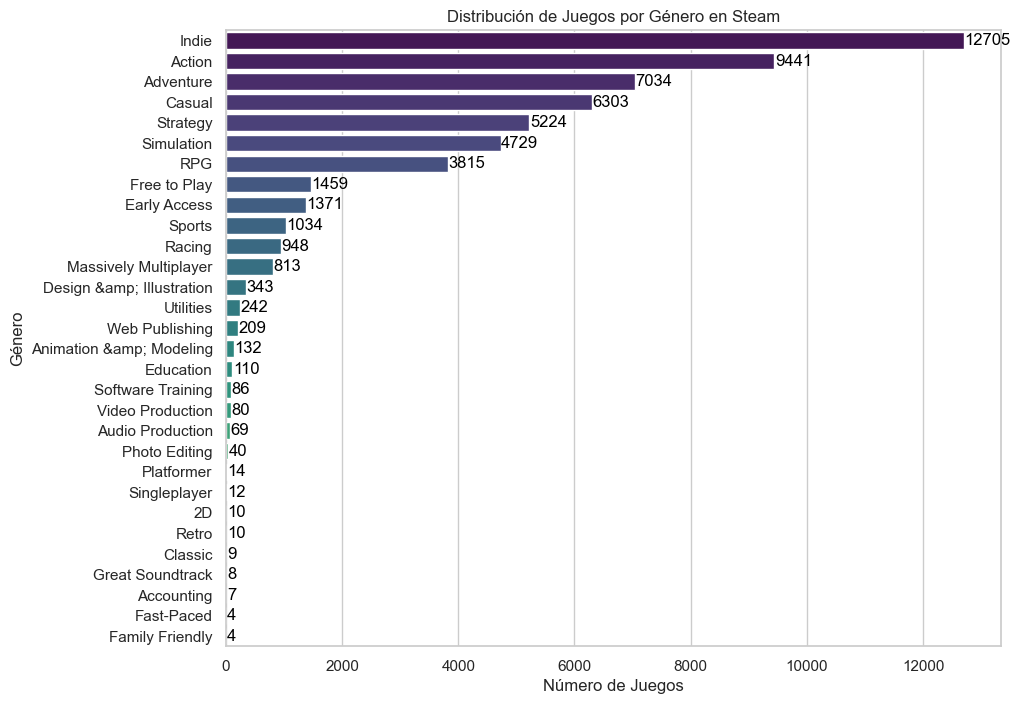

In [36]:

# Seleccionando los géneros del dataframe:
top_genres = df_outputsteam_games['genres'].value_counts().nlargest(30)

# Creando el gráfico de barras horizontales
plt.figure(figsize=(10, 8))
barplot = sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')

# Etiquetas y título:
plt.xlabel('Número de Juegos')
plt.ylabel('Género')
plt.title('Distribución de Juegos por Género en Steam')

# Mostrar el número de juegos al lado de cada barra:
for i, v in enumerate(top_genres.values):
    barplot.text(v + 10, i, str(v), color='black', va='center')

# Mostrar el gráfico
plt.show()


Los generos con mayor cantidad de juegos son: Indie,Action,Adventure y Casual

In [37]:
# distribucion de juegos por nombre:

nombre_juego = df_outputsteam_games["app_name"].value_counts() 
nombre_juego

app_name
The Elder Scrolls IV: Oblivion® Game of the Ye...    20
Sonic Adventure DX                                   20
Endless Horde                                        20
Call of Cthulhu®: Dark Corners of the Earth          18
Sonic CD                                             18
                                                     ..
Binary Domain                                         1
Hitman: Absolution: High Roller Disguise              1
Train Simulator: Southern Railway S15 Class St...     1
Train Simulator: Class 67 Diamond Jubilee Loco...     1
FSX Steam Edition: Hong Kong FSX Live Add-On          1
Name: count, Length: 22837, dtype: Int64

In [38]:
# obtenemos la cantidad de juegos por desarrollador
desarrolladores = df_outputsteam_games["developer"].value_counts() 
desarrolladores

developer
DL Softworks                   495
Ubisoft - San Francisco        354
Arcane Raise                   268
Dovetail Games                 256
Choice of Games                200
                              ... 
Cavedog Entertainment            1
x86-Games                        1
Alan Hazelden,Harry Lee          1
Good Games,OXON Game Studio      1
Hexagons Studio                  1
Name: count, Length: 10385, dtype: Int64

Observamos la distribución de la participación de los desarrolladores en el conjunto de datos y viendo  qué desarrolladores tienen más juegos en la plataforma Steam

In [39]:
# obtenemos la cantidad de juegos por editor o empresa publicadora
empresa_public = df_outputsteam_games["publisher"].value_counts() 
empresa_public


publisher
kiss ltd                   785
ubisoft                    659
degica                     525
sega                       431
paradox interactive        428
                          ... 
rovio entertainment ltd      1
frog the door games          1
lava flow games llc          1
spoony bard productions      1
peter gutenko                1
Name: count, Length: 7758, dtype: Int64

Se observan valores que  indican cuántos juegos están asociados con la empresa editora. 
Esto permitirá analizar qué empresas 
han publicado más juegos en la plataforma Steam.

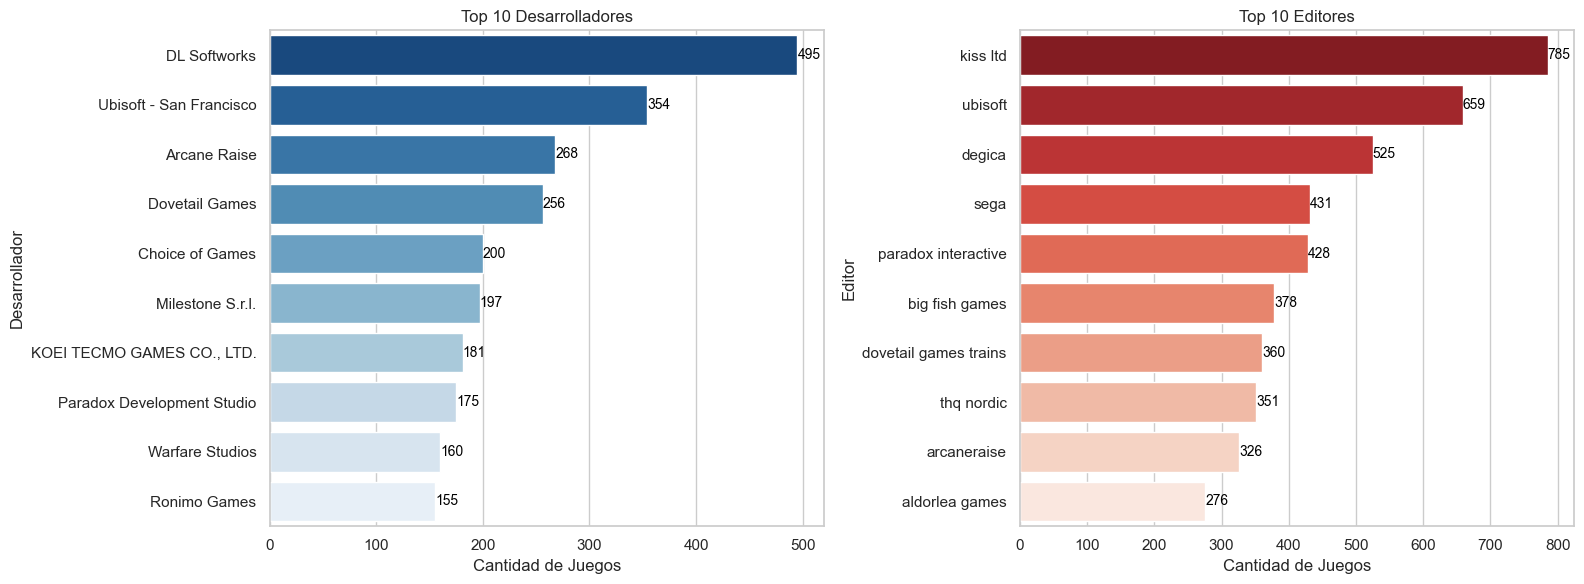

In [40]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

developer_data = desarrolladores[:10]
sns.barplot(x=developer_data.values, y=developer_data.index, ax=axes[0], palette="Blues_r")
axes[0].set_xlabel('Cantidad de Juegos')
axes[0].set_ylabel('Desarrollador')
axes[0].set_title('Top 10 Desarrolladores')

for i, v in enumerate(developer_data.values):
    axes[0].text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

publisher_data = empresa_public[:10]
sns.barplot(x=publisher_data.values, y=publisher_data.index, ax=axes[1], palette="Reds_r")
axes[1].set_xlabel('Cantidad de Juegos')
axes[1].set_ylabel('Editor')
axes[1].set_title('Top 10 Editores')

for i, v in enumerate(publisher_data.values):
    axes[1].text(v + 0.1, i, str(v), color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

EDA DEL DATAFRAME USER_REVIEWS

In [41]:
# Especificando la ruta del archivo Parquet
parquet_file_path = 'df_user_reviews.parquet'

# Leyendo el archivo Parquet en un DataFrame de Pandas
df_user_reviews = pq.read_table(parquet_file_path).to_pandas()

# Ahora, df_user_reviews contiene los datos del archivo Parquet
df_user_reviews

,user_id,item_id,helpful,recommend,review,posted year,sentiment_analysis
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011,2
1,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011,1
2,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
3,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014,2
4,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013,2
...,...,...,...,...,...,...,...
48493,wayfeng,730,1 of 1 people (100%) found this review helpful,True,its FUNNNNNNNN,2015,1
48494,76561198251004808,253980,No ratings yet,True,Awesome fantasy game if you don't mind the gra...,2015,2
48495,72947282842,730,No ratings yet,True,Prettyy Mad Game,2015,1
48496,ApxLGhost,730,No ratings yet,True,AMAZING GAME 10/10,2015,2


In [42]:
#  cantidad de datos nulos en el df

datos_nulos = df_user_reviews.isnull().sum()
print(datos_nulos)

user_id               0
item_id               0
helpful               0
recommend             0
review                0
posted year           0
sentiment_analysis    0
dtype: int64


In [43]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48498 non-null  object
 1   item_id             48498 non-null  object
 2   helpful             48498 non-null  object
 3   recommend           48498 non-null  bool  
 4   review              48498 non-null  object
 5   posted year         48498 non-null  object
 6   sentiment_analysis  48498 non-null  int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 2.3+ MB


In [44]:
#  verificando duplicados
datos_duplicados = df_user_reviews.duplicated()

#  viendo la cantidad total de duplicados, puedes sumar los valores True
cantidad_duplicados = datos_duplicados.sum()

# imprimira True para las filas que son duplicadas y False para las que no lo son
print(datos_duplicados)

# cantidad total de filas duplicadas en el DataFrame
print(f"Cantidad total de filas duplicadas: {cantidad_duplicados}")


0        False
1        False
2        False
3        False
4        False
         ...  
48493    False
48494    False
48495    False
48496    False
48497    False
Length: 48498, dtype: bool
Cantidad total de filas duplicadas: 0


In [45]:
df_user_reviews


,user_id,item_id,helpful,recommend,review,posted year,sentiment_analysis
0,76561197970982479,1250,No ratings yet,True,Simple yet with great replayability. In my opi...,2011,2
1,76561197970982479,22200,No ratings yet,True,It's unique and worth a playthrough.,2011,1
2,76561197970982479,43110,No ratings yet,True,Great atmosphere. The gunplay can be a bit chu...,2011,2
3,js41637,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...,2014,2
4,js41637,227300,0 of 1 people (0%) found this review helpful,True,For a simple (it's actually not all that simpl...,2013,2
...,...,...,...,...,...,...,...
48493,wayfeng,730,1 of 1 people (100%) found this review helpful,True,its FUNNNNNNNN,2015,1
48494,76561198251004808,253980,No ratings yet,True,Awesome fantasy game if you don't mind the gra...,2015,2
48495,72947282842,730,No ratings yet,True,Prettyy Mad Game,2015,1
48496,ApxLGhost,730,No ratings yet,True,AMAZING GAME 10/10,2015,2


In [46]:
df_user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48498 entries, 0 to 48497
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             48498 non-null  object
 1   item_id             48498 non-null  object
 2   helpful             48498 non-null  object
 3   recommend           48498 non-null  bool  
 4   review              48498 non-null  object
 5   posted year         48498 non-null  object
 6   sentiment_analysis  48498 non-null  int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 2.3+ MB


In [47]:
df_user_reviews.describe()

,sentiment_analysis
count,48498.000000
mean,1.471855
std,0.640124
min,0.000000
25%,1.000000
50%,2.000000
75%,2.000000
max,2.000000


In [48]:
# se contabiliza la cantidad de usuarios de juegos Steam que hay en la plataforma 
cantidad_users= len(df_user_reviews["user_id"].unique())
cantidad_users

22795

In [49]:
# contabilizando la cantidad de recomendaciones hechas de juegos steam:
cant_recomend= df_user_reviews["recommend"].value_counts()
cant_recomend

recommend
True     43557
False     4941
Name: count, dtype: int64

In [50]:

#  Filtrando las reseñas recomendadas
recommended_reviews = df_user_reviews[df_user_reviews['recommend'] == True]

# Contando las recomendaciones por juego (item_id)
recommended_games_count = recommended_reviews.groupby('item_id').size().reset_index(name='recommendation_count')

# Identificando los 10 juegos más recomendados
top_10_recommended_games = recommended_games_count.nlargest(10, 'recommendation_count')

# Muestra los resultados (los 10 juegos más recomendados)
top_10_games_list = top_10_recommended_games['item_id'].tolist()

# Filtrando el dataframe original para obtener detalles de los juegos más recomendados
top_10_games_details = df_user_reviews[df_user_reviews['item_id'].isin(top_10_games_list)][['item_id', 'recommend']].drop_duplicates()

# Muestra los detalles de los 10 juegos más recomendados
print("Los 10 juegos más recomendados por los usuarios:")
print(top_10_games_details)


Los 10 juegos más recomendados por los usuarios:
     item_id  recommend
19       730       True
23       550       True
26     72850       True
27       440       True
28    304930       True
29      4000       True
35       570       True
36    218620       True
59       570      False
74    105600       True
107   252490       True
311   304930      False
350      440      False
374   218620      False
600   252490      False
885      730      False
965      550      False
1162    4000      False
2358  105600      False
2764   72850      False


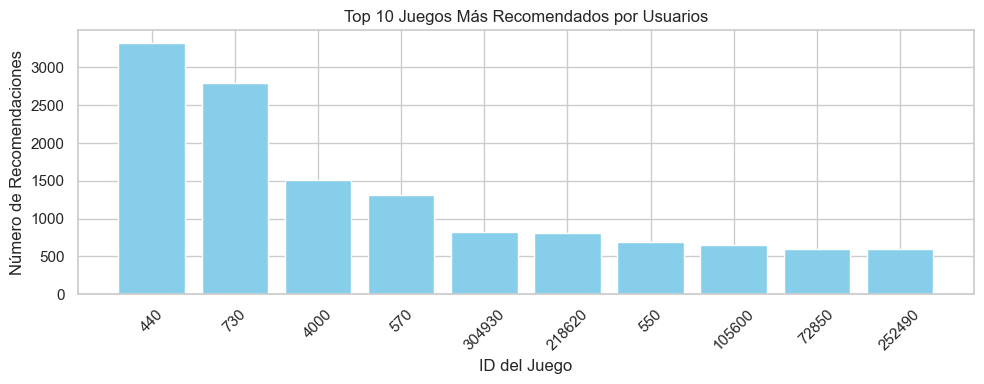

In [51]:

# Filtrando las reseñas recomendadas
recommended_reviews = df_user_reviews[df_user_reviews['recommend'] == True]

# contando las recomendaciones por juego (item_id)
recommended_games_count = recommended_reviews.groupby('item_id').size().reset_index(name='recommendation_count')

# Identificando los 10 juegos más recomendados
top_10_recommended_games = recommended_games_count.nlargest(10, 'recommendation_count')

# Muestra los detalles de los 10 juegos más recomendados
top_10_games_list = top_10_recommended_games['item_id'].tolist()

# Filtrando el dataframe original para obtener detalles de los juegos más recomendados
top_10_games_details = df_user_reviews[df_user_reviews['item_id'].isin(top_10_games_list)][['item_id', 'recommend']].drop_duplicates()

# Creando un gráfico de barras para visualizar los 10 juegos más recomendados
plt.figure(figsize=(10, 4))
plt.bar(top_10_recommended_games['item_id'], top_10_recommended_games['recommendation_count'], color='skyblue')

# Configurando el título y etiquetas de los ejes
plt.title('Top 10 Juegos Más Recomendados por Usuarios')
plt.xlabel('ID del Juego')
plt.ylabel('Número de Recomendaciones')

# Rota los ticks del eje x para una mejor visualización
plt.xticks(rotation=45)

# Muestra el gráfico
plt.tight_layout()
plt.show()


In [52]:
#realizo el conteo de cada una de las categorias de sentimientos
cant_sent= df_user_reviews["sentiment_analysis"].value_counts()
cant_sent

sentiment_analysis
2    26777
1    17828
0     3893
Name: count, dtype: int64

In [53]:

# Convertiendo la columna 'posted year ' a tipo datetime :
df_user_reviews['posted year'] = pd.to_datetime(df_user_reviews['posted year'], errors='coerce')

# Filtrando solo las filas con sentimientos válidos (0 para negativo, 1 para neutral, 2 para positivo)
valid_sentiments = df_user_reviews[df_user_reviews['sentiment_analysis'].isin([0, 1, 2])]

# Mapeo de los puntajes de sentimiento a etiquetas ('Negative', 'Neutral', 'Positive')
sentiment_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
valid_sentiments['sentiment_label'] = valid_sentiments['sentiment_analysis'].map(sentiment_mapping)

# Obteniendo el rango completo de años presentes en el dataframe
min_year = df_user_reviews['posted year'].dt.year.min()
max_year = df_user_reviews['posted year'].dt.year.max()

# Creando una serie con todos los años en el rango completo
all_years = pd.Series(range(min_year, max_year + 1))

# Agrupando por año (posted year) y sentimiento (sentiment_label) y contar las reseñas en cada grupo
sentiment_counts_by_year = valid_sentiments.groupby([df_user_reviews['posted year'].dt.year, 'sentiment_label']).size().unstack(fill_value=0)

# Reindexando el dataframe para incluir todos los años en el rango completo
sentiment_counts_by_year = sentiment_counts_by_year.reindex(all_years, fill_value=0)

# Calculando el total de reseñas por año
total_reviews_by_year = df_user_reviews.groupby(df_user_reviews['posted year'].dt.year).size()

# Reindexando la serie de total de reseñas para incluir todos los años en el rango completo
total_reviews_by_year = total_reviews_by_year.reindex(all_years, fill_value=0)

# Calculando el porcentaje de sentimientos por año
sentiment_percentages_by_year = sentiment_counts_by_year.div(total_reviews_by_year, axis=0) * 100

# Mostrar el resultado
print("Porcentaje de sentimientos por año:")
print(sentiment_percentages_by_year)


Porcentaje de sentimientos por año:
sentiment_label  Negative    Neutral   Positive
2010             4.545455  30.303030  65.151515
2011             6.226415  27.547170  66.226415
2012             5.911740  33.222315  60.865945
2013             5.556383  33.412781  61.030836
2014             7.598241  36.099661  56.302098
2015             9.661783  39.319158  51.019059


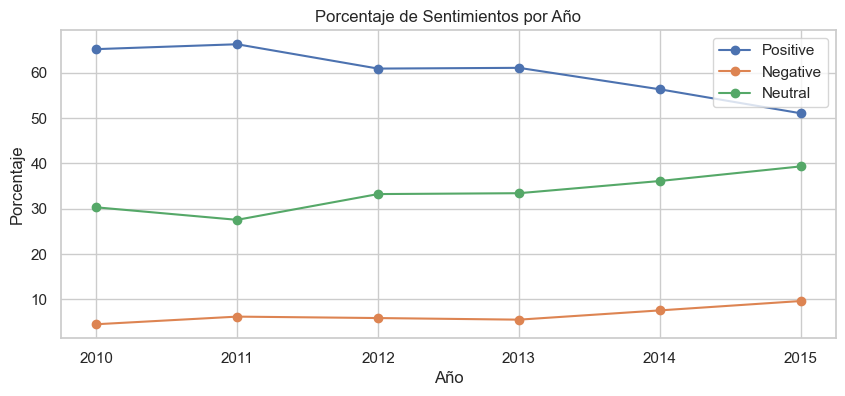

In [54]:

# Creando el gráfico de líneas para visualizar los porcentajes de sentimientos por año
plt.figure(figsize=(10, 4))

# Graficando el porcentaje de sentimientos positivos
plt.plot(sentiment_percentages_by_year.index, sentiment_percentages_by_year['Positive'], label='Positive', marker='o')

# Graficando el porcentaje de sentimientos negativos
plt.plot(sentiment_percentages_by_year.index, sentiment_percentages_by_year['Negative'], label='Negative', marker='o')

# Graficando el porcentaje de sentimientos neutrales
plt.plot(sentiment_percentages_by_year.index, sentiment_percentages_by_year['Neutral'], label='Neutral', marker='o')

# Configurando el título y las etiquetas de los ejes
plt.title('Porcentaje de Sentimientos por Año')
plt.xlabel('Año')
plt.ylabel('Porcentaje')
plt.xticks(sentiment_percentages_by_year.index)  # Configurar los ticks del eje x como los años
plt.legend()  # Mostrar la leyenda

# Muestra el gráfico
plt.grid(True)
plt.show()


se puede observar que el porcentaje de valores con sentimientos positivos fue mayor hacia el anio 2015 con un aprox del 60% de sentimientos positivos, mientras que los negativos fueron en ligera tendencia al aumento llegando desde el 2010 con un 5% hasta el 2015 con un aprox del 10%.Los sentimientos neutrales  estuvieron entre todos esos anios en un rango entre el 30 y 40 %

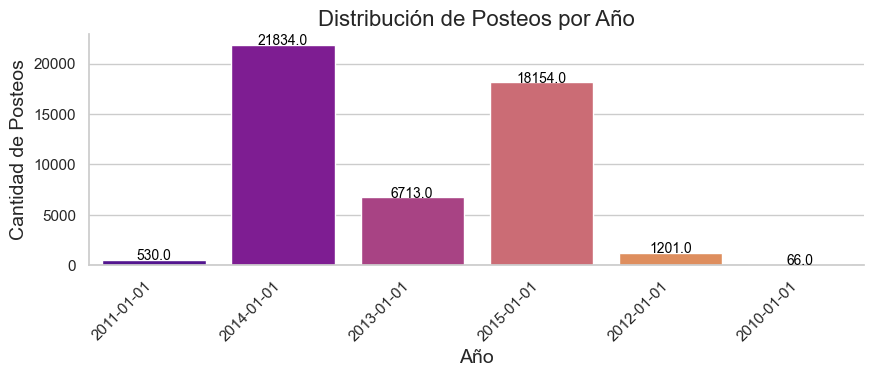

In [55]:
sns.set(style="whitegrid", palette="plasma")

plt.figure(figsize=(10, 3))

ax = sns.countplot(data=df_user_reviews, x=df_user_reviews["posted year"], palette="plasma")

ax.set_title('Distribución de Posteos por Año', fontsize=16)
ax.set_xlabel('Año', fontsize=14)
ax.set_ylabel('Cantidad de Posteos', fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=10, color='black')

sns.despine()
plt.show()


EDA del df_user_items

In [56]:
# Ruta del archivo Parquet
parquet_file_path = 'df_user_items_explode.parquet'

# Cargando el archivo Parquet en un DataFrame de Pandas
df_items = pq.read_table(parquet_file_path).to_pandas()

# Ahora, df contiene los datos del archivo Parquet
df_items


,user_id,items_count,item_id,item_name,playtime_forever
0,76561197970982479,277,10,Counter-Strike,6.0
1,76561197970982479,277,20,Team Fortress Classic,0.0
2,76561197970982479,277,30,Day of Defeat,7.0
3,76561197970982479,277,40,Deathmatch Classic,0.0
4,76561197970982479,277,50,Half-Life: Opposing Force,0.0
...,...,...,...,...,...
5170009,76561198329548331,7,346330,BrainBread 2,0.0
5170010,76561198329548331,7,373330,All Is Dust,0.0
5170011,76561198329548331,7,388490,One Way To Die: Steam Edition,3.0
5170012,76561198329548331,7,521570,You Have 10 Seconds 2,4.0


In [57]:
#  cantidad de datos nulos en cada columna

datos_nulos = df_items.isnull().sum()
print(datos_nulos)

user_id             0
items_count         0
item_id             0
item_name           0
playtime_forever    0
dtype: int64


In [58]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5094092 entries, 0 to 5170013
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   user_id           object 
 1   items_count       int64  
 2   item_id           object 
 3   item_name         object 
 4   playtime_forever  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 233.2+ MB


In [59]:

#  verificando duplicados
datos_duplicados = df_items.duplicated()

#  viendo la cantidad total de duplicados, sumar los valores True
cantidad_duplicados = datos_duplicados.sum()

# imprimirá True para las filas que son duplicadas y False para las que no lo son
print(datos_duplicados)

# cantidad total de filas duplicadas en el DataFrame
print(f"Cantidad total de filas duplicadas: {cantidad_duplicados}")


0          False
1          False
2          False
3          False
4          False
           ...  
5170009    False
5170010    False
5170011    False
5170012    False
5170013    False
Length: 5094092, dtype: bool
Cantidad total de filas duplicadas: 0


In [60]:
# obteniendo la cantidad de juegos únicos presente en Steam
cant_juegos = len(df_items["item_name"].unique()) 
cant_juegos

10947

In [61]:
# obtenemos la cantidad de juegos por nombre
juego = df_items["item_name"].value_counts() 
juego

item_name
Dota 2 Test                               49136
Counter-Strike: Global Offensive          43332
Garry's Mod                               42849
Unturned                                  38278
Left 4 Dead 2 Beta                        36661
                                          ...  
Preston Sterling                              1
Happy Town People                             1
Kapsul Infinite                               1
Warhammer 40,000: Armageddon - Da Orks        1
Arachnophobia                                 1
Name: count, Length: 10947, dtype: int64

In [62]:
# obtenienndo la cantidad de juegos por usuario
items_count = df_items.groupby('user_id')['items_count'].unique().explode() 

# convirtiendo a dataframe(item_counts: cantidad de juegos que ha consumido el ususario)
items_count= pd.DataFrame(items_count) 

# ordenando de mayor a menor
items_count_user = items_count.sort_values('items_count', ascending=False) 
items_count_user

,items_count
user_id,
phrostb,7762
thugnificent,6700
chidvd,6410
piepai,6132
mayshowganmore,5027
...,...
76561198092978311,1
76561198092984441,1
76561198092985047,1


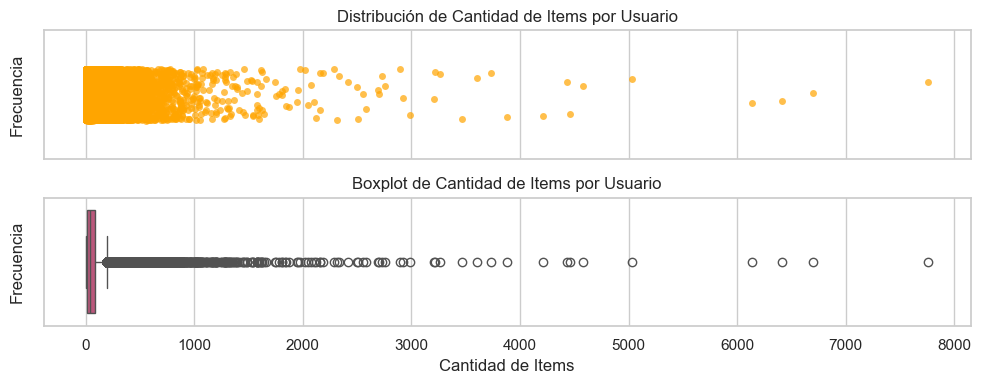

In [63]:
#distribucion de cantidad de Items por usuario y boxplot de cantidad de items por usuario:
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=items_count_user, x='items_count', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Cantidad de Items')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Cantidad de Items por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=items_count_user, x='items_count', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Cantidad de Items')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Cantidad de Items por Usuario')

plt.tight_layout()
plt.show()

Se crea una figura con dos subplots que muestran la distribución de la cantidad de ítems por usuario utilizando diferentes tipos de gráficos: un stripplot (gráfico de dispersión de puntos) y un boxplot (diagrama de caja).

In [64]:
items_count_user.describe()

,items_count
count,70912
unique,924
top,1
freq,3303


In [65]:
# obteniendo el tiempo de juego por usuario
time_count = df_items.groupby('user_id')['playtime_forever'].unique().explode() 

# convertimos a dataframe
time_count = pd.DataFrame(time_count) 

# ordenamos de mayor a menor
time_count_user = time_count.sort_values('playtime_forever', ascending=False) 
time_count_user

,playtime_forever
user_id,
wolop,642773.0
Evilutional,635295.0
76561198019826668,632452.0
76561198039832932,613411.0
tsunamitad,600068.0
...,...
76561198031798372,0.0
Cjixeres,0.0
76561198085797241,0.0


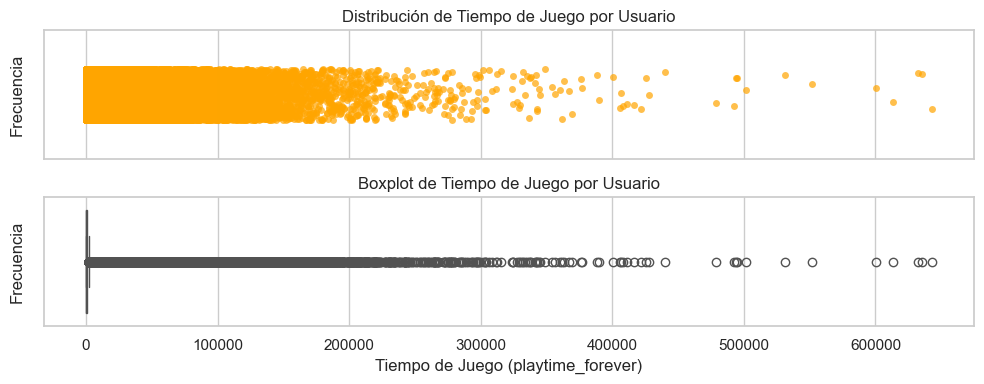

In [66]:
#distribucion de tiempo de juego por usuario:
sns.set(style="whitegrid", palette="plasma")

fig, axes = plt.subplots(2, 1, figsize=(10, 4), sharex=True)

# Subplot 1 - Stripplot
sns.stripplot(data=time_count_user, x='playtime_forever', ax=axes[0], color="orange", jitter=0.2, alpha=0.7)
axes[0].set_xlabel('Tiempo de Juego (playtime_forever)')
axes[0].set_ylabel('Frecuencia')
axes[0].set_title('Distribución de Tiempo de Juego por Usuario')

# Subplot 2 - Boxplot
sns.boxplot(data=time_count_user, x='playtime_forever', ax=axes[1], palette="plasma")
axes[1].set_xlabel('Tiempo de Juego (playtime_forever)')
axes[1].set_ylabel('Frecuencia')
axes[1].set_title('Boxplot de Tiempo de Juego por Usuario')

plt.tight_layout()
plt.show()

In [67]:
time_count_user.describe()

,playtime_forever
count,2890282.0
unique,48861.0
top,0.0
freq,66878.0


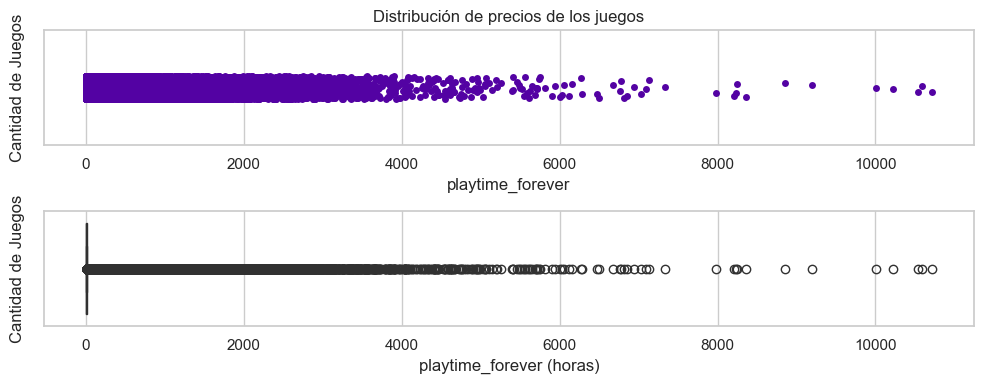

In [68]:
#distribución del tiempo de juego (en horas) de los juegos mediante stripplot) y boxplot

df_items['playtime_hours'] = df_items['playtime_forever'] / 60

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_items, x='playtime_hours', ax=ax1)
ax1.set_xlabel('playtime_forever') ; ax1.set_ylabel('Cantidad de Juegos') ; ax1.set_title('Distribución de precios de los juegos')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_items, x='playtime_hours', ax=ax2)
ax2.set_xlabel('playtime_forever (horas)') ; ax2.set_ylabel('Cantidad de Juegos')

# Muestra y ajuste el espaciado entre subplots
plt.tight_layout()
plt.show()

In [69]:

# Calculando estadísticas descriptivas del tiempo de juego en horas
estadisticas = df_items['playtime_hours'].describe()

# Calculando el percentil 75% manualmente
percentil_75 = df_items['playtime_hours'].quantile(0.75)

# Imprimir las estadísticas descriptivas
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas["50%"], 2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas["mean"], 2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(percentil_75, 2)}')


El precio medio (mediana) de los juegos es de: 0.57
El precio promedio (mean) de los juegos es de: 16.51
El 75% de los juegos tienen un precio menor de: 5.92


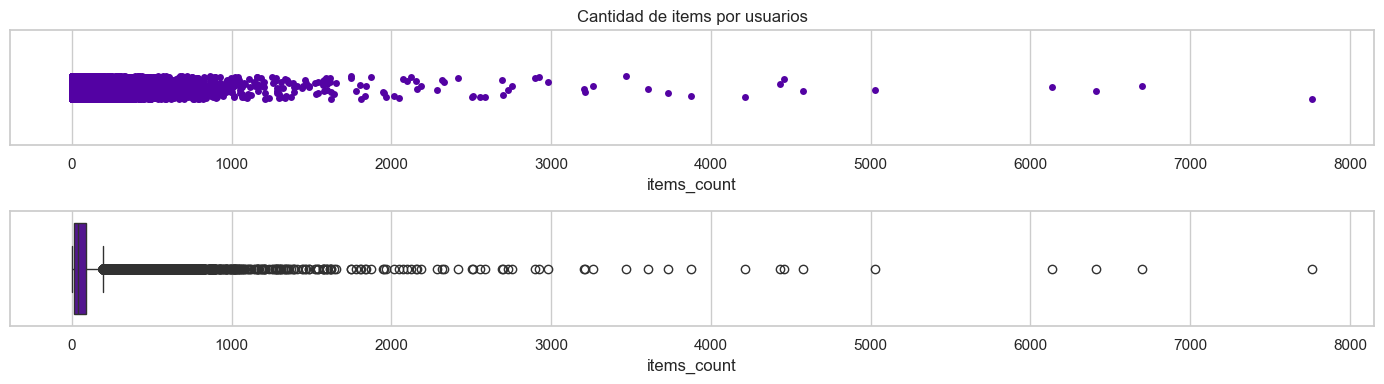

In [74]:
#Columna 'items_count'

# frecuencia de la cantidad de juegos que consumen o compraron alguna vez los usuarios.

# Agrupando por usuario la cantidad de items, convirtiendo en data frame y los ordenando de mayor a menor
items_count_user = df_items.groupby('user_id')['items_count'].unique().explode()
items_count_user = pd.DataFrame(items_count_user)
items_count_user_o = items_count_user.sort_values('items_count', ascending=False)

fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=items_count_user_o, x='items_count', ax=ax1)
ax1.set_xlabel('items_count') ; ax1.set_title('Cantidad de items por usuarios')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=items_count_user_o, x='items_count', ax=ax2)
ax2.set_xlabel('items_count')

# Muestra y ajuste  del espaciado entre subplots
plt.tight_layout()
plt.show()


In [76]:

# Calcular estadísticas descriptivas del conteo de items por usuario
estadisticas = items_count_user['items_count'].astype(float).describe()

# Imprimir las estadísticas descriptivas
print(f'El precio medio (mediana) de los juegos es de: {round(estadisticas["50%"], 2)}')
print(f'El precio promedio (mean) de los juegos es de: {round(estadisticas["mean"], 2)}')
print(f'El 75% de los juegos tienen un precio menor de: {round(estadisticas["75%"], 2)}')

# Calcular límites para identificar valores atípicos
Q1 = items_count_user['items_count'].quantile(0.25)
Q3 = items_count_user['items_count'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = items_count_user[(items_count_user['items_count'] < lower_bound) | (items_count_user['items_count'] > upper_bound)]

# Imprimir cantidad de valores atípicos
print(f'Cantidad de valores atípicos (outliers): {len(outliers)}')


El precio medio (mediana) de los juegos es de: 40.0
El precio promedio (mean) de los juegos es de: 71.84
El 75% de los juegos tienen un precio menor de: 87.0
Cantidad de valores atípicos (outliers): 4957


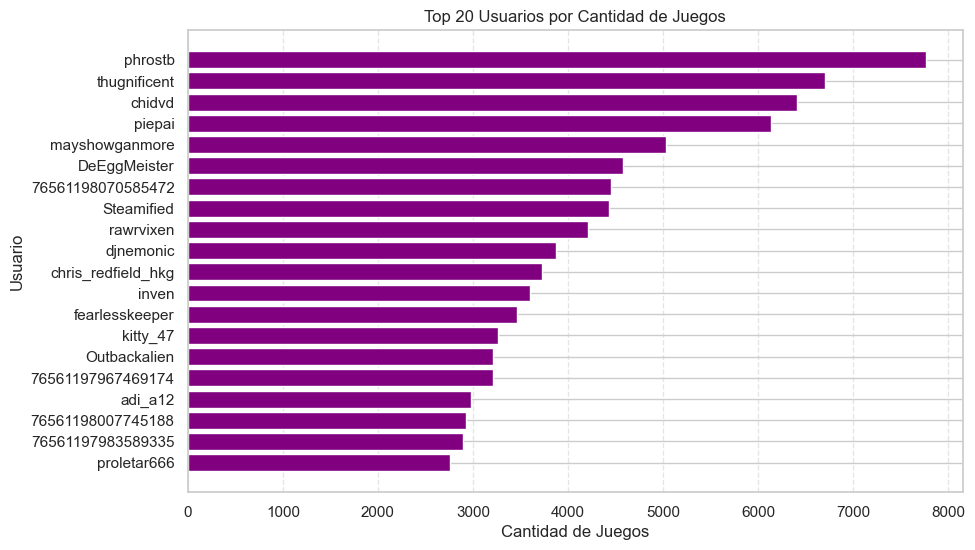

In [93]:
import matplotlib.pyplot as plt

# Ordenar los usuarios por cantidad de juegos (en orden descendente)
items_count_user_sorted = items_count_user.sort_values(by='items_count', ascending=False)[:20]

# Crear la figura y el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
plt.barh(items_count_user_sorted.index, items_count_user_sorted['items_count'], color='purple')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Usuario')
plt.title('Top 20 Usuarios por Cantidad de Juegos')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar el usuario con más juegos arriba
plt.grid(axis='x', linestyle='--', alpha=0.5)  # Añadir líneas de cuadrícula en el eje x
plt.show()


Se puede ver que el usuario que mas cantidad de juegos a consumido es de aaprox 7600 juegos.